# Predicting Car Prices
Author: Jimmy Nguyen (github.com/jnguyen)

# Introduction

In this project, I use K-Nearest Neighbors (KNN) to predict a car's market value based on its attributes in relation to cars on the market. To implement this, I use `sklearn` and `pandas`. The data I'm using is the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile) from the UCI Machine Learning Repository.

In [13]:
# Import data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Read in data
cars = pd.read_csv('imports-85.data', header=None,
                   names=["symboling", "normalized-losses",
                          "make", "fuel-type", "aspiration",
                          "num-of-doors", "body-style",
                          "drive-wheels", "engine-location",
                          "wheel-base", "length", "width",
                          "height", "curb-weight", "engine-type",
                          "num-of-cylinders", "engine-size",
                          "fuel-system", "bore", "stroke",
                          "compression-ratio", "horsepower",
                          "peak-rpm", "city-mpg", "highway-mpg",
                          "price"])

In [14]:
# Data preview: first few rows
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

Since KNN is sensitive to scales, we'll need to normalize the data before we proceed. In addition, we'll properly encode missing values and ensure that columns have the correct `int` or `float` types.

## Cleaning up missing values and data types

In [15]:
# Recode missing values
cars = cars.replace('?',np.nan)

In [16]:
# Check data types
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

Some columns with the `object` type are actually numeric, but were coerced as an object because missing values were coded as `?`. So, we'll need to convert them to `float`. This is because we're going to normalize the feature columns later, and also because `np.nan` is only valid for `float` columns.

In [17]:
# Convert to proper type
cars = cars.astype({'normalized-losses': float,
             'bore': float,
             'stroke': float,
             'horsepower': float,
             'peak-rpm': float,
             'price': float})


Finally, we can convert some columns to more workable formats.

In [18]:
# num-of-doors can be categorical in the context of cars
# but to use with KNN we'll convert it to numeric
cars['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [19]:
cars['num-of-doors'] = cars['num-of-doors'].map({'four': 4, 'two': 2})

In [20]:
# num-of-cylinders can be categorical in the context of cars
# but to use with KNN we'll convert it to numeric
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [21]:
cars['num-of-cylinders'] = cars['num-of-cylinders'].map({'two': 2,
                                                         'three': 3,
                                                         'four': 4,
                                                         'five': 5,
                                                         'six': 6,
                                                         'eight': 8,
                                                         'twelve': 12})

## Missing Values

The most important column to consider is the target, `price`, so we'll drop values that have missing price. For the rest, we'll fill with the average value for that column.

In [22]:
# Since we want to predict price, drop all missing price rows
cars = cars.dropna(subset=['price'])
cars.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [23]:
# For other columns, fill with average value
cars = cars.fillna(cars.mean())
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalize feature columns

We will now take all numeric columns as features and price as the target. We will normalize all feature columns to the range `0` to `1`. Note that we'll be making data copies here using this approach to avoid editing the underlying data. For larger datasets, it may be more appropriate to do inplace replacements or to preprocess before loading into Python to conserve memory and speed up the code.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Define and scale numeric features to 0 to 1 range except for target price
scaled_cars = cars.copy()
scaled_cars = scaled_cars.select_dtypes(exclude=object).drop('price', axis=1)
scaled_cars = (scaled_cars - scaled_cars.min()) / (scaled_cars.max() - scaled_cars.min())
scaled_cars['price'] = cars['price'] # keep original price column

# KNN Price Modeling

## Univariate case

We'll start simple by only training on a single feature column at a time and calculating the RMSE to evaluate model fit.

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [27]:
# df: pandas df
# Train: list of training column names
# Target: str, name of target column
def knn_train_test(df, train_col, target_col, k=5, seed=3928678):
    # Split training into 70-30
    M = df.shape[0]
    train_m = int(M * 0.7)
    
    # Permute indices before assigning splits
    np.random.seed(seed)
    perm_index = np.random.permutation(M)
    df = df.iloc[perm_index]
    train_df = df.iloc[:train_m]
    test_df = df.iloc[train_m:]
    
    # Run KNN model and return RMSE
    model = KNeighborsRegressor(k)
    model.fit(train_df[train_col], train_df[target_col])
    predictions = model.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [28]:
rmses = {}
target = 'price'
for col in scaled_cars.columns.drop('price'):
    rmses[col] = knn_train_test(scaled_cars, [col], target)
print(pd.Series(rmses).sort_values())

engine-size          3155.491815
horsepower           3214.009086
highway-mpg          3933.959041
city-mpg             4168.776418
curb-weight          4196.662842
width                4519.982861
num-of-cylinders     4843.706731
compression-ratio    5619.988635
length               5764.838620
stroke               6175.607887
bore                 6198.945875
peak-rpm             6704.444500
normalized-losses    7156.784356
wheel-base           7744.176161
symboling            7804.650855
height               7861.991622
num-of-doors         8936.698797
dtype: float64


We now fit the model over various values of `k` and plot the RMSE values to find the optimal k for the case of training with just `horsepower`.

In [29]:
# Grid search over k
k_vals = [1,3,5,7,9]
rmses_grid = {}
for col in scaled_cars.columns.drop('price'):
    rmses = {}
    for k in k_vals:
        rmses[k] = knn_train_test(scaled_cars, [col], 'price', k)
    rmses_grid[col] = rmses
print(pd.DataFrame(rmses_grid))

     symboling  normalized-losses  num-of-doors   wheel-base       length  \
1  6951.584722       11975.771220  25178.447202  4463.054225  4697.593931   
3  9166.864572        8964.508531   9446.909231  7231.814856  5198.042474   
5  7804.650855        7156.784356   8936.698797  7744.176161  5764.838620   
7  7231.382769        6950.052006   9265.548939  7052.517859  5835.831976   
9  6756.641552        7355.334516   8964.497443  6668.522647  5822.859915   

         width       height  curb-weight  num-of-cylinders  engine-size  \
1  3712.462231  7785.733913  5553.198812       5286.540847  3451.629437   
3  4060.698144  6707.084667  4619.278588       5201.812004  2780.128982   
5  4519.982861  7861.991622  4196.662842       4843.706731  3155.491815   
7  4297.673183  7068.788544  4107.160771       4789.089545  3095.507685   
9  4263.779824  7721.998332  4202.405423       4863.112404  3253.430887   

          bore       stroke  compression-ratio   horsepower     peak-rpm  \
1  6745.61

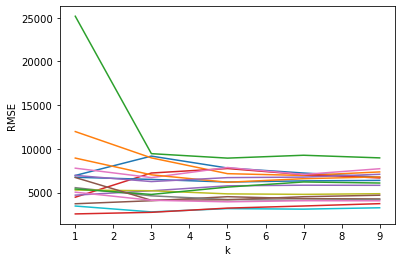

In [30]:
# Plot RMSE for each column
for k,v in rmses_grid.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k')
    plt.ylabel('RMSE')

It is hard to tell from the above plot what exactly the optimal `k` value is, but at a glance, it appears that it could be `k=3` or `k=5`. Note, however, that the optimal `k` will also depend on the random seed, because the row indices were permuted before train/test split assignments.

## Multivariate Case

Usually when we run a KNN, we want to use multiple features to improve the prediction accuracy. We now consider the multivariate case. We'll begin by using all features.

In [31]:
all_features = scaled_cars.columns.drop('price').tolist()
target = 'price'
rmse_all_Features = knn_train_test(scaled_cars, all_features, target)
print(rmse_all_Features)

4200.3203805986195


Using all features runs the danger of overfitting. So, for this project, we will perform feature seelction by selecting `q` features with the lowest RMSE from the univariate models we fit above, using `k=5`, as that value of `k` appeared to be reasonable.

In [32]:
# Select q best features based on RMSE from univariate grid search
def best_features(rmses_grid, q):
    return (pd.DataFrame(rmses_grid).loc[5]         # k = 5
                                    .sort_values()  # sort by RMSE
                                    .head(q)        # select q features
                                    .index          # get feature names
                                    .tolist())      # convert to list

In [33]:
# Dict to store RMSE per q features
rmse_q_features = {}

# Select the features with the lowest RMSE for k=5
q_list = [2,3,4,5]
target = 'price'

# Perform grid search
for q in q_list:
    train_col = best_features(rmses_grid, q)
    rmse = knn_train_test(scaled_cars, train_col, target)
    rmse_q_features[q] = {'features': train_col,
                          'rmse': rmse}
    
pd.DataFrame(rmse_q_features)

,2,3,4,5
features,"[engine-size, horsepower]","[engine-size, horsepower, highway-mpg]","[engine-size, horsepower, highway-mpg, city-mpg]","[engine-size, horsepower, highway-mpg, city-mp..."
rmse,2603.57,2506.07,2513.3,3286.86


It appears that using 2-4 features is the best, as they all provide comparable RMSE values. In order of ascending RMSE from the univariate case, these features are:

* engine size
* horsepower
* highway MPG
* city MPG

Interestingly, these features all have to do with car performance in terms of raw power and fuel efficiency.

Next, we will find the optimal k by plotting RMSE vs `k` in a similar manner that we did in the univariate case.

In [34]:
rmse_q_k_features = {} # dict to store rmse per value of k
target = 'price'

# Perform grid search of RMSE for 2-4 features, k = 1:25
for q in range(2,5):
    rmses = {}
    train_col = rmse_q_features[q]['features']
    for k in range(1,26):
        rmses[k] = knn_train_test(scaled_cars, train_col, target, k)
    rmse_q_k_features[q] = rmses

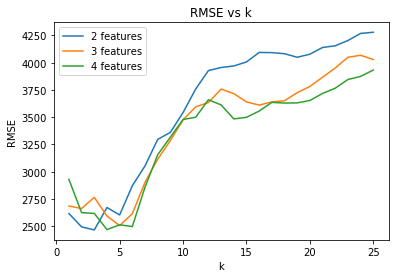

In [35]:
# Plot RMSE
for k,v in rmse_q_k_features.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)

plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs k')
plt.legend(['2 features','3 features','4 features'])
plt.show()

We can see that the optimal `k` value for each model is as follows:

|  Number of Features |  optimal k |
|---------------------|------------|
| 2                   | 3          |
| 3                   | 5          |
| 4                   | 4          |

As for the best model going by RMSE alone, it appears to be with 2 features only concerning engine size and horsepower with `k=3`. However, since using 4 features which also cover fuel effiency with `k=5` has very similar RMSE performance, it makes sense to use the bigger model in this case for better generalizability, as using only 2 features may have high bias in this case.

Note too that these values were for only one seed. An alternate approach could be to average over many random seeds for better generalizability.

# Final Model

The final model we decided on and trained uses car performance and fuel effiency to make predictions about the price, and has an RMSE of about $2,500, meaning that it should make predictions within that much error. Let's take a modified versino of our training function to spit out a model to make predictions with.

In [36]:
# Train: list of training column names
# Target: str, name of target column
def knn_train(df, train_col, target_col, k=5, seed=3928678):
    # Split training into 70-30
    M = df.shape[0]
    train_m = int(M * 0.7)
    
    # Permute indices before assigning splits
    np.random.seed(seed)
    perm_index = np.random.permutation(M)
    df = df.iloc[perm_index]
    train_df = df.iloc[:train_m]
    test_df = df.iloc[train_m:]
    
    # Run KNN model and return RMSE
    model = KNeighborsRegressor(k)
    model.fit(train_df[train_col], train_df[target_col])
    
    return model

Let's find out what our model would price a car with the following stats:

* Engine size 110
* Horsepower 300
* Highway MPG 34
* City MPG 28

Recall that our model was fit on scaled features. So, to make predictions, we need to apply the same scaling we used in training the model.

In [37]:
best_model = knn_train(scaled_cars, best_features(rmses_grid, 4), 'price')

In [38]:
def scale_feature(values,df=cars,features=['engine-size', 'horsepower', 'highway-mpg', 'city-mpg']):
    scaled_df = df[features]
    scaled_vals = (values - scaled_df.min()) / (scaled_df.max() - scaled_df.min())
    
    return(list(scaled_vals))

In [39]:
my_car = scale_feature([110,300,34,28])
best_model.predict([my_car])

array([27957.2])

Looks like about $28,000. Pretty good price!

How about a less effient, less powerful car?

* Engine size 75
* Horsepower 170
* Highway MPG 42
* City MPG 36

In [40]:
my_car = scale_feature([75,170,42,36])
best_model.predict([my_car])

array([6954.6])

Only $7,000 for our puny but efficient car. Not a bad deal for someone looking to save money, perhaps.

# Conclusion

KNN is a good model to use when you want to predict an outcome based on similarity of attributes to other objects. 

In this case, we came up with a model to predict car prices based on car performance and fuel effiency. The model can then be operationalized by plugging in the relevant car specs to obtain a predicted price. An example of where this might be useful is to set a ballpark price for a new auto listing.